<a href="https://colab.research.google.com/github/ChristyJeyaPriya/Aerofit/blob/main/Delhivery_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delhivery - Case Study
Delhivery is a prominent logistics and supply chain services company based in India. Founded in 2011, it has grown rapidly to become one of the leading players in the industry. The company provides a comprehensive range of logistics solutions, including express parcel delivery, freight, cross-border, and supply chain services to both individuals and businesses.

Delhivery has positioned itself as a critical player by leveraging technology to provide efficient and reliable services. Its broad range of logistics solutions makes it a preferred partner for many e-commerce companies and businesses looking to optimize their supply chain operations.

# Problem Statement
**1. Ensuring Data Integrity and Quality:**
Need to address missing values and structure its dataset appropriately to maintain high standards of data integrity and quality.

**2. Feature Extraction for Forecasting Models**:
There is a need to extract valuable features from raw data to build accurate forecasting models that can predict demand, optimize routes, and manage inventory effectively.

**3. Pattern and Insight Identification**:
Identifying patterns, gaining insights, and generating actionable recommendations are crucial for optimizing logistics operations and improving decision-making processes.

**4. Hypothesis Testing and Outlier Detection:**
Conducting hypothesis testing and detecting outliers are essential for refining processes and further enhancing the quality of service provided by Delhivery.

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from scipy.stats import levene
from scipy.stats import wilcoxon


# Loading Data

In [2]:
df = pd.read_csv("delhivery_data.csv")

In [3]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.tail(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


# 1. Basic Analysis

In [5]:
# rows , columns
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Information about the data:**

1. **data** - tells whether the data is testing or training data
2. **trip_creation_time** – Timestamp of trip creation
3. **route_schedule_uuid** – Unique ID for a particular route schedule
4. **route_type** – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. **trip_uuid** - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. **source_center** - Source ID of trip origin
7. **source_name** - Source Name of trip origin
8. **destination_cente** – Destination ID
9. **destination_name** – Destination Name
10. **od_start_time** – Trip start time
11. **od_end_time** – Trip end time
12. **start_scan_to_end_scan** – Time taken to deliver from source to destination
13. **is_cutoff** – Unknown field
14. **cutoff_factor** – Unknown field
15. **cutoff_timestamp** – Unknown field
16. **actual_distance_to_destination** – Distance in kms between source and destination
warehouse
17. **actual_time** – Actual time taken to complete the delivery (Cumulative)
18. **osrm_time** – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. **osrm_distance** – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. **factor** – Unknown field
21. **segment_actual_time** – This is a segment time. Time taken by the subset of the
package delivery
22. **segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. **segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of
the package delivery
24. **segment_factor** – Unknown field

In [7]:
# dropping unknown fields
unknown_fields = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"]
df.drop(columns = unknown_fields, inplace = True)

In [8]:
# No. of unique values in each column
df_columns = df.columns
for i in df_columns:
  print(f"{i}: {df[i].nunique()}")

data: 2
trip_creation_time: 14817
route_schedule_uuid: 1504
route_type: 2
trip_uuid: 14817
source_center: 1508
source_name: 1498
destination_center: 1481
destination_name: 1468
od_start_time: 26369
od_end_time: 26369
start_scan_to_end_scan: 1915
actual_distance_to_destination: 144515
actual_time: 3182
osrm_time: 1531
osrm_distance: 138046
segment_actual_time: 747
segment_osrm_time: 214
segment_osrm_distance: 113799


In [9]:
# 10 unique values from each column to understand the data
df_columns = df.columns
for i in df_columns:
  print(f"{i}: {df[i].unique()[:10]}")
  print()


data: ['training' 'test']

trip_creation_time: ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' '2018-09-13 20:44:19.424489'
 '2018-09-29 22:21:45.149226' '2018-09-17 21:26:00.454695'
 '2018-09-12 01:33:48.711350' '2018-10-01 16:00:45.719099'
 '2018-09-27 14:16:14.819357' '2018-09-13 16:41:41.992300']

route_schedule_uuid: ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6'
 'thanos::sroute:76951383-1608-44e4-a284-46d92e82a8b5'
 'thanos::sroute:0904e75c-b3ac-4278-96cf-802835a1d5fc'
 'thanos::sroute:87d41453-285f-40a2-b56c-64d56e1b4cd8'
 'thanos::sroute:5f7d8d49-ae14-430e-9333-37361e1e9457'
 'thanos::sroute:182fdad4-dc74-4c7d-ada4-0a76d4c763ed'
 'thanos::sroute:1283977c-889a-4e96-b632-5ba1a69427a1'
 'thanos::sroute:f89c0465-3cc6-44b2-9bb3-d4f6b8349ac2']

route_type: ['Carting' 'FTL']

trip_uuid: ['trip-153741093647649320' 'trip-15376849

In [10]:
# after dropping unwanted columns, the shape of the dataset
df.shape

(144867, 19)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [12]:
df.describe(include = "object").T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


**Insights:**

1. trip_uuid is the unique identifier, each trip is divided into several sub_trips.

2. OSRM time and distance is the open source routing engine generated time and distance between source and destination.

3. Dataset contains 2 types of data training and test

4. 2 types of route_type : Carting and FTL

5. segment OSRM time and segment OSRM distance is the genarated values for the subtrip, while actual_distance_to_destination and actual_time are the time and distance related to the whole trip.

# 2. Conveting column datatypes

In [13]:
#converting date fields from object datatype to datetime datatype
date_columns = ["trip_creation_time", "od_start_time", "od_end_time"]
for i in date_columns:
  df[i] = pd.to_datetime(df[i])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [15]:

print(f"The dateset has records from date : {df['trip_creation_time'].min()} to : {df['trip_creation_time'].max()}")


The dateset has records from date : 2018-09-12 00:00:16.535741 to : 2018-10-03 23:59:42.701692


**Insights:**

*   The dataset conatains data from the year 2018 and months 9 and 10
(September and October)



# 3. Identifing missing values

In [16]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

find for what all sorce centre, source name is missing. similar for destination as well

In [17]:
df["source_name"].fillna(df["source_center"].str.slice(-3), inplace = True)

In [18]:
df["destination_name"].fillna(df["destination_center"].str.slice(-3), inplace = True)

**source_name and destination_name had missing values. So the missing values are replaced using the code from source_centre and destiation_centre**

In [19]:
df.isna().sum()


data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

**Insights:**

1. source_name column had 293 null values

2. destination_column had 261 null values.

3. The null values from the source_name column and destination_name column is removed using source_center and destination_center last 3 characters

# 4. Feature Engineering
  **4.1 Trip Duration**


In [20]:
df["od_time_diff_hour"] = round(((df["od_end_time"] - df["od_start_time"])/np.timedelta64(1,"h")),2)

In [21]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,1.44
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,1.44
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,1.44
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,1.44
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,1.44


**4.2 Destination City, Destination State and Destination Place**

In [22]:
# Creating new features destination_city,destination_place, destination_state from destination_name
df["destination_city"] = df["destination_name"].str.split("_").str.get(0)
df["destination_place"] = df["destination_name"].str.split("_").str.get(1)
df["destination_state"] = df["destination_name"].str.split("_").str.get(2).str.split("(").str.get(1).str.split(")").str.get(0)

In [23]:
df.iloc[[1,2,3],[8,20, 21,22]]

,destination_name,destination_city,destination_place,destination_state
1,Khambhat_MotvdDPP_D (Gujarat),Khambhat,MotvdDPP,Gujarat
2,Khambhat_MotvdDPP_D (Gujarat),Khambhat,MotvdDPP,Gujarat
3,Khambhat_MotvdDPP_D (Gujarat),Khambhat,MotvdDPP,Gujarat


In [24]:
#Finding no. of unique trip ids from each source city
df_destination_place_tripCount = df.groupby("destination_place")["trip_uuid"].nunique().reset_index()
df_destination_place_tripCount.rename(columns = {"trip_uuid": "trip_count"}, inplace = True)
df_destination_place_tripCount = df_destination_place_tripCount.sort_values("trip_count", ascending= False)
df_destination_place_tripCount[:10]

,destination_place,trip_count
164,Central,1575
123,Bilaspur,971
698,Nelmngla,665
581,Mankoli,614
912,Shamshbd,464
595,Mehmdpur,434
528,Kundli,387
272,East,359
139,Bomsndra,358
1006,Tathawde,330


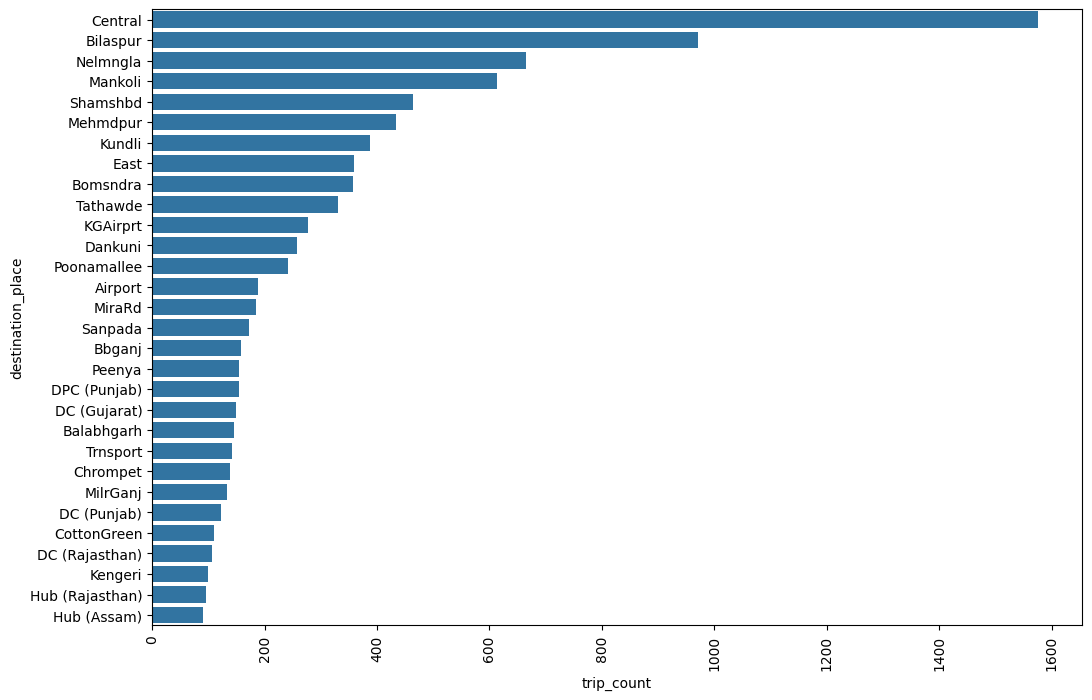

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(data =df_destination_place_tripCount[:30], y = "destination_place", x = "trip_count")
plt.xticks(rotation = 90)
plt.show()

In [29]:
# Finding the no. of unique trip ids for each  destination city
df['destination_city'] = df['destination_city'].replace('Bengaluru', 'Bangalore')
df_destination_city_tripCount = df.groupby("destination_city")["trip_uuid"].nunique().reset_index()
df_destination_city_tripCount.rename(columns = {"trip_uuid": "trip_count"}, inplace = True)
df_destination_city_tripCount.sort_values("trip_count", ascending= False, inplace = True)
df_destination_city_tripCount[:10]

,destination_city,trip_count
112,Bangalore,1804
424,Gurgaon,984
784,Mumbai,966
468,Hyderabad,635
176,Bhiwandi,614
302,Delhi,576
237,Chandigarh,466
244,Chennai,414
1138,Sonipat,390
962,Pune,388


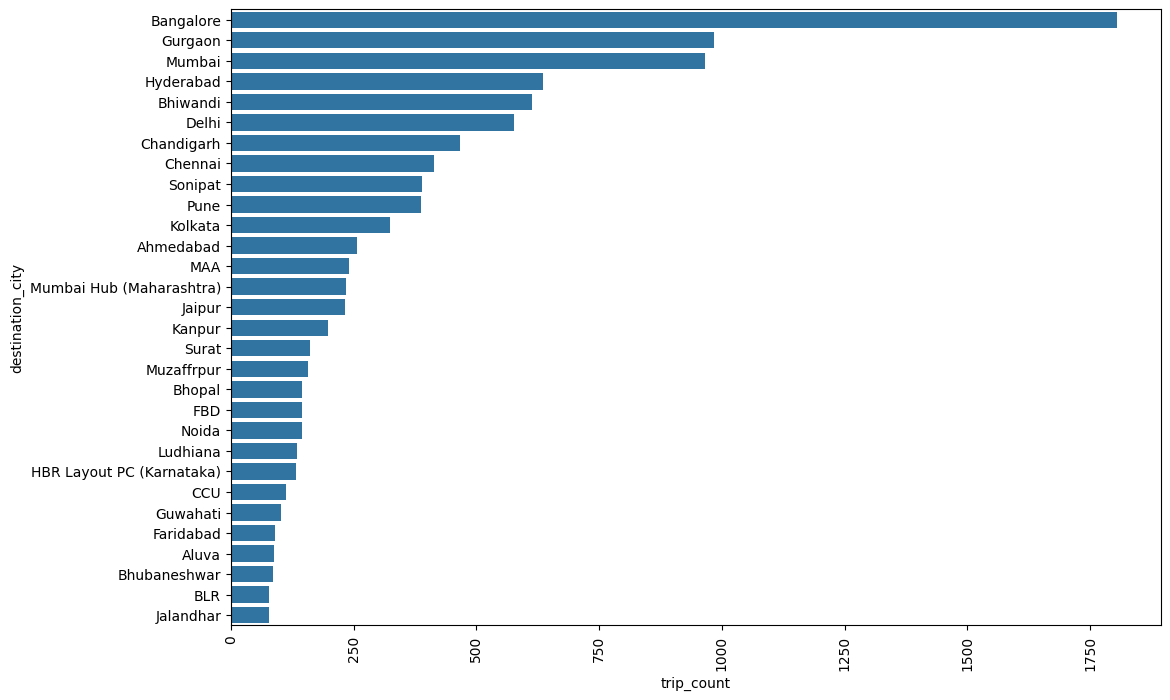

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(data =df_destination_city_tripCount[:30], y= "destination_city", x = "trip_count")
plt.xticks(rotation = 90)
plt.show()

In [28]:
# Finding the no. of unique trip ids for each  destination state
df_destination_state_tripCount = df.groupby("destination_state")["trip_uuid"].nunique().reset_index()
df_destination_state_tripCount.rename(columns = {"trip_uuid": "trip_count"}, inplace = True)
df_destination_state_tripCount.sort_values("trip_count", ascending= False, inplace = True)
df_destination_state_tripCount[:10]

,destination_state,trip_count
14,Karnataka,2293
17,Maharashtra,2095
10,Haryana,1656
24,Tamil Nadu,1019
25,Telangana,856
27,Uttar Pradesh,691
29,West Bengal,679
22,Punjab,597
7,Delhi,595
0,Andhra Pradesh,501


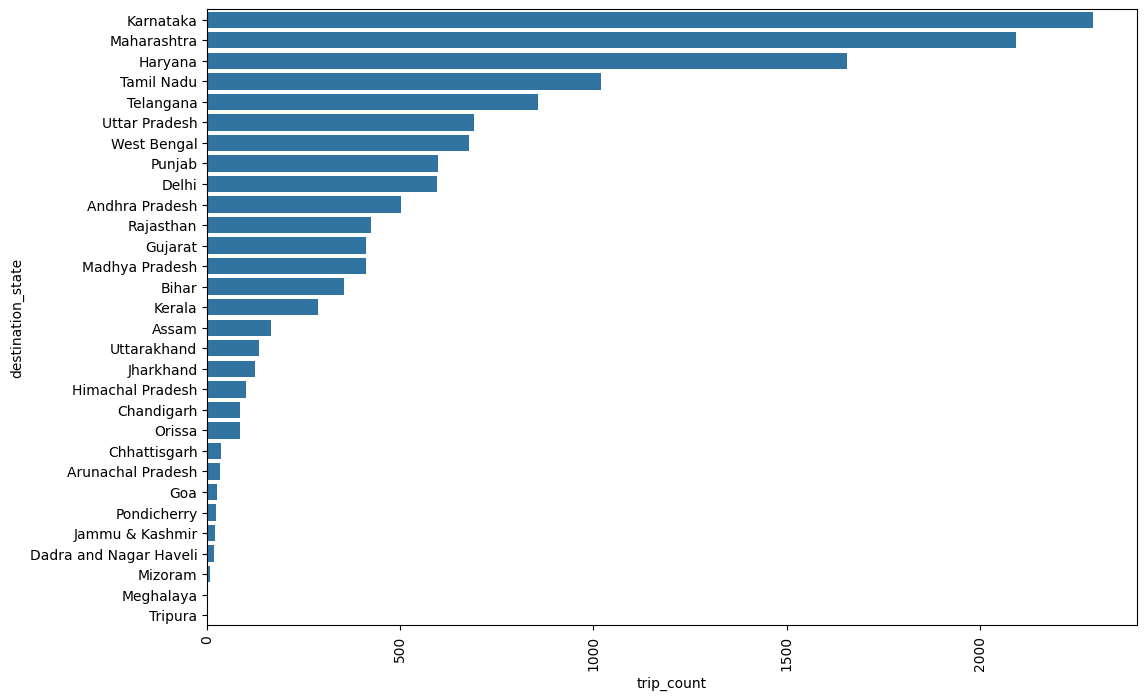

In [30]:
plt.figure(figsize= (12,8))
sns.barplot(data =df_destination_state_tripCount[:30], y = "destination_state", x = "trip_count")
plt.xticks(rotation = 90)
plt.show()

**4.3 Sorce City, Source State and Source Place**

In [31]:
# Creating new features source_city,source_place, source_state from source_name
df["source_city"] = df["source_name"].str.split("_").str.get(0)
df["source_place"] = df["source_name"].str.split("_").str.get(1)
df["source_state"] = df["source_name"].str.split("_").str.get(2).str.split("(").str.get(1).str.split(")").str.get(0)

In [32]:
df.iloc[[1,2,3],[6,23,24,25]]

,source_name,source_city,source_place,source_state
1,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,Gujarat
2,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,Gujarat
3,Anand_VUNagar_DC (Gujarat),Anand,VUNagar,Gujarat


In [33]:
#Finding no. of unique trip ids from each source city
df_source_place_tripCount = df.groupby("source_place")["trip_uuid"].nunique().reset_index()
df_source_place_tripCount.rename(columns = {"trip_uuid": "trip_count"}, inplace = True)
df_source_place_tripCount.sort_values("trip_count", ascending= False, inplace = True)
df_source_place_tripCount[:10]

,source_place,trip_count
172,Central,1696
127,Bilaspur,1085
596,Mankoli,821
719,Nelmngla,769
146,Bomsndra,468
1031,Tathawde,403
613,Mehmdpur,370
281,East,365
437,KGAirprt,331
935,Shamshbd,329


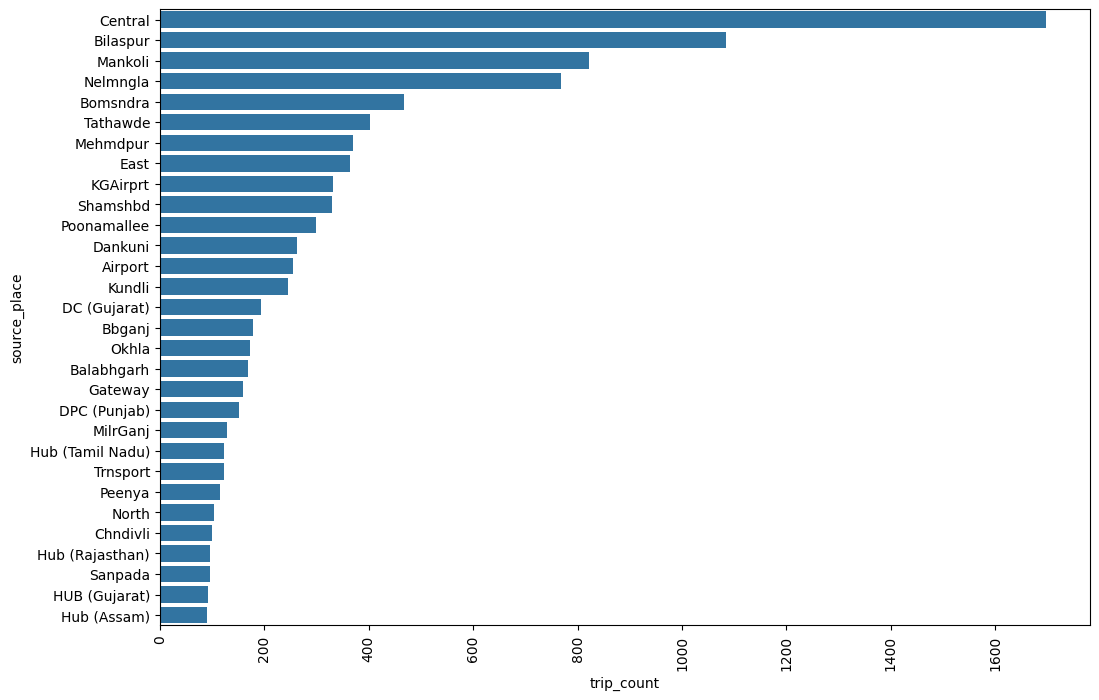

In [34]:
plt.figure(figsize = (12,8))
sns.barplot(data =df_source_place_tripCount[:30], y = "source_place", x = "trip_count")
plt.xticks(rotation = 90)
plt.show()

In [35]:
#Finding no. of unique trip ids from each source city
df_source_city_tripCount = df.groupby("source_city")["trip_uuid"].nunique().reset_index()
df_source_city_tripCount.rename(columns = {"trip_uuid": "trip_count"}, inplace = True)
df_source_city_tripCount.sort_values("trip_count", ascending= False, inplace = True)
df_source_city_tripCount[:10]

,source_city,trip_count
430,Gurgaon,1141
145,Bengaluru,1099
177,Bhiwandi,821
107,Bangalore,792
789,Mumbai,654
308,Delhi,620
475,Hyderabad,567
965,Pune,490
240,Chandigarh,417
247,Chennai,347


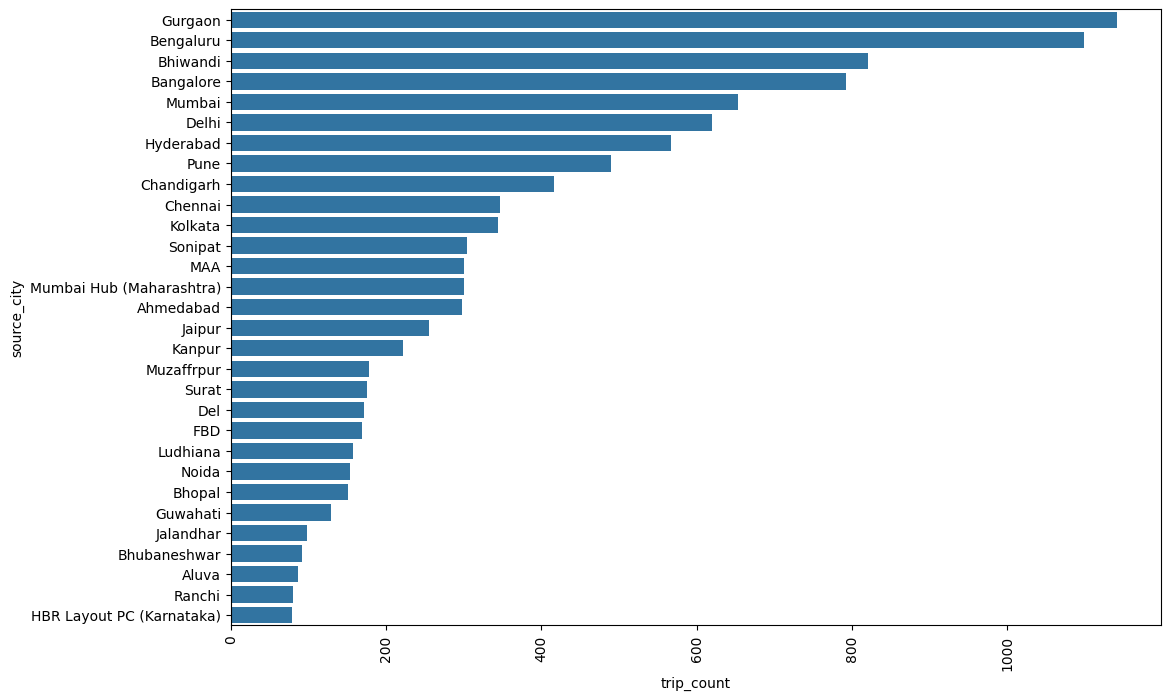

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data =df_source_city_tripCount[:30], y = "source_city", x = "trip_count")
plt.xticks(rotation = 90)
plt.show()

In [37]:
# Finding the no. of unique trip ids from each  source state
df_source_state_tripCount = df.groupby("source_state")["trip_uuid"].nunique().reset_index()
df_source_state_tripCount.rename(columns = {"trip_uuid": "trip_count"}, inplace = True)
df_source_state_tripCount.sort_values("trip_count", ascending= False, inplace = True)
df_source_state_tripCount[:10]

,source_state,trip_count
14,Karnataka,2259
17,Maharashtra,2143
10,Haryana,1740
24,Tamil Nadu,948
25,Telangana,796
7,Delhi,782
27,Uttar Pradesh,661
29,West Bengal,630
22,Punjab,566
0,Andhra Pradesh,498


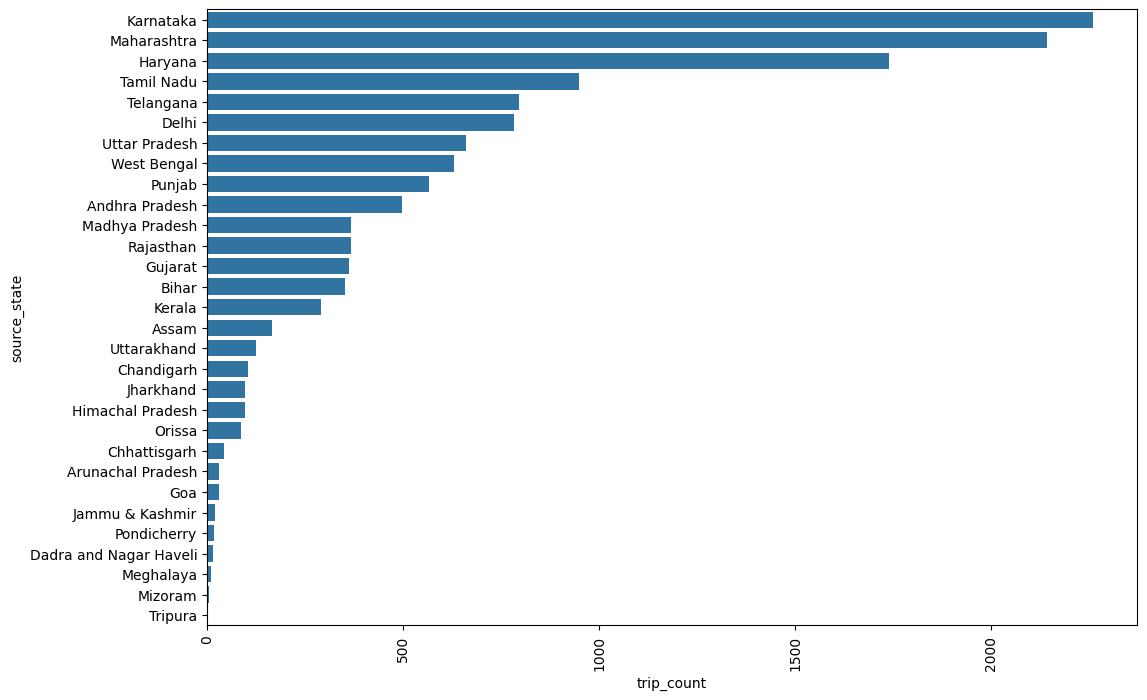

In [38]:
plt.figure(figsize= (12,8))
sns.barplot(data =df_source_state_tripCount[:30], y = "source_state", x = "trip_count")
plt.xticks(rotation = 90)
plt.show()

**Insights:**

1. By calculating the difference between od_start_time and 	od_end_time, we are creating a new feature column od_time_diff_hour.

2. od_time_diff_hour column contains the value in hours- time taken to complete the trip.

3. Source_name contains 4 details city, place, code and state. By separating the information, we are creating  3 new feature columns source_city, source_place and source_state.
4. Based on the analysis of the source_name feature columns, Gurgaon emerges as the leading city in terms of the number of packages sent,
while Karnataka ranks highest among the states.

5. The top five states in terms of package sending are Karnataka, Maharashtra, Haryana, Tamil Nadu, and Telangana.

6. Similarly, destination_name contains 4 details. city, place, code and state. By By separating the information, we are creating  3 new feature columns destination_city, destination_place and destination_state.
7. Based on the analysis of the destination name feature columns, Bengaluru is the top recipient city for packages, while Karnataka receives the most packages among the states.

8. Top 5 states in terms of package receiving are Karnataka, Maharashtra, Haryana, Tamil Nadu, and Telangana.

# 5. Grouping Data for better understanding

In [39]:
# Creating a unique identifier for different segments of a trip based on the combination of the trip_uuid,
# source_center, and destination_center and naming it as segment_key.

df["segment_key"] = df["trip_uuid"] + "_"+df["source_center"] +"_"+df["destination_center"]

In [40]:
df_segmentkey = df.groupby("segment_key")["trip_uuid"].count().reset_index()
df_segmentkey.rename(columns ={ "trip_uuid" : "sub_trip_count"}, inplace = True)

In [41]:
df_segmentkey.sort_values("sub_trip_count", ascending = False)[:5]

,segment_key,sub_trip_count
12209,trip-153755502932196495_IND160002AAC_IND562132AAA,81
25489,trip-153854253003897121_IND000000ACB_IND600056AAB,79
23477,trip-153837097390448401_IND000000ACB_IND600056AAB,79
22497,trip-153828700829921150_IND000000ACB_IND600056AAB,79
1583,trip-153681464570847135_IND000000ACB_IND600056AAB,79


**Maximun no of sub trips to complete a particular trip is 81.**

In [42]:
# Using groupby find the total actual time, total segment_orsm_distance and segment_orsm_time to complete.

# Orsm time - An open-source routing engine time calculator which computes the shortest path between points in a given map.

# orsm distance - An open-source routing engine which computes the shortest path between points in a given map.

grouping_1=['trip_uuid','source_center','destination_center']
df1=df.groupby(by=grouping_1,as_index=False).agg({'data':'first',
                                                  'route_type':'first',
                                                  'trip_creation_time':'first',
                                                  'source_name':'first',
                                                  'destination_name':'last',
                                                  "od_time_diff_hour": "last",
                                                  'start_scan_to_end_scan':'first',
                                                  'actual_distance_to_destination':'last',
                                                  'actual_time':'last',
                                                  'osrm_time':'last',
                                                  'osrm_distance':'last',
                                                  'segment_actual_time':'sum',
                                                  'segment_osrm_time':'sum',
                                                  'segment_osrm_distance':'sum',
                                                  "segment_key" : "first"})


In [43]:
df1.rename(columns = { "segment_actual_time": "cum_segment_actual_time",
                      "segment_osrm_time" : "cum_segment_osrm_time",
                       "segment_osrm_distance": "cum_segment_osrm_distance"
                     }, inplace = True)


In [ ]:
df1.head(3)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance,segment_key
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),21.01,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,trip-153671041653548748_IND209304AAA_IND000000ACB
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),16.66,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,trip-153671041653548748_IND462022AAA_IND209304AAA
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),0.98,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,trip-153671042288605164_IND561203AAB_IND562101AAA


In [44]:
df1.iloc[[1,2,3], [1,11,12,13,14,15,16]]

,source_center,actual_time,osrm_time,osrm_distance,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance
1,IND462022AAA,830.0,388.0,544.8027,820.0,474.0,649.8528
2,IND561203AAB,47.0,26.0,28.1994,46.0,26.0,28.1995
3,IND572101AAA,96.0,42.0,56.9116,95.0,39.0,55.9899


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26368 non-null  object        
 1   source_center                   26368 non-null  object        
 2   destination_center              26368 non-null  object        
 3   data                            26368 non-null  object        
 4   route_type                      26368 non-null  object        
 5   trip_creation_time              26368 non-null  datetime64[ns]
 6   source_name                     26368 non-null  object        
 7   destination_name                26368 non-null  object        
 8   od_time_diff_hour               26368 non-null  float64       
 9   start_scan_to_end_scan          26368 non-null  float64       
 10  actual_distance_to_destination  26368 non-null  float64       
 11  ac

In [46]:
df1.describe(include = "float64").T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,26368.0,4.979340,7.342634,0.350000,1.520000,2.540000,5.120000,131.640000
start_scan_to_end_scan,26368.0,298.278671,440.561588,20.000000,91.000000,152.000000,307.000000,7898.000000
actual_distance_to_destination,26368.0,92.425217,209.415035,9.001351,21.684419,35.114228,65.750726,1927.447705
actual_time,26368.0,200.690193,384.853640,9.000000,51.000000,84.000000,168.000000,4532.000000
osrm_time,26368.0,90.686704,185.080423,6.000000,25.000000,39.000000,72.000000,1686.000000
osrm_distance,26368.0,114.827642,253.773765,9.072900,27.764725,43.633050,85.566975,2326.199100
cum_segment_actual_time,26368.0,198.863092,381.283224,9.000000,50.000000,83.000000,166.000000,4504.000000
cum_segment_osrm_time,26368.0,101.681318,215.650948,6.000000,25.000000,42.000000,79.000000,1938.000000
cum_segment_osrm_distance,26368.0,125.423680,285.932556,9.072900,28.471300,45.944400,91.351975,2640.924700


In [47]:
numerical_columns =['od_time_diff_hour','start_scan_to_end_scan','actual_distance_to_destination','actual_time',
                    'osrm_time','osrm_distance','cum_segment_actual_time','cum_segment_osrm_time','cum_segment_osrm_distance']
df1[numerical_columns].corr()

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance
od_time_diff_hour,1.000000,0.999981,0.906284,0.954484,0.911217,0.911379,0.954456,0.904411,0.908136
start_scan_to_end_scan,0.999981,1.000000,0.906266,0.954473,0.911197,0.911361,0.954460,0.904397,0.908123
actual_distance_to_destination,0.906284,0.906266,1.000000,0.948995,0.994893,0.997217,0.947989,0.987161,0.992742
actual_time,0.954484,0.954473,0.948995,1.000000,0.953152,0.953845,0.999988,0.947958,0.952183
osrm_time,0.911217,0.911197,0.994893,0.953152,1.000000,0.998384,0.952218,0.992269,0.992677
osrm_distance,0.911379,0.911361,0.997217,0.953845,0.998384,1.000000,0.952905,0.990975,0.994311
cum_segment_actual_time,0.954456,0.954460,0.947989,0.999988,0.952218,0.952905,1.000000,0.947032,0.951255
cum_segment_osrm_time,0.904411,0.904397,0.987161,0.947958,0.992269,0.990975,0.947032,1.000000,0.996500
cum_segment_osrm_distance,0.908136,0.908123,0.992742,0.952183,0.992677,0.994311,0.951255,0.996500,1.000000


<Axes: >

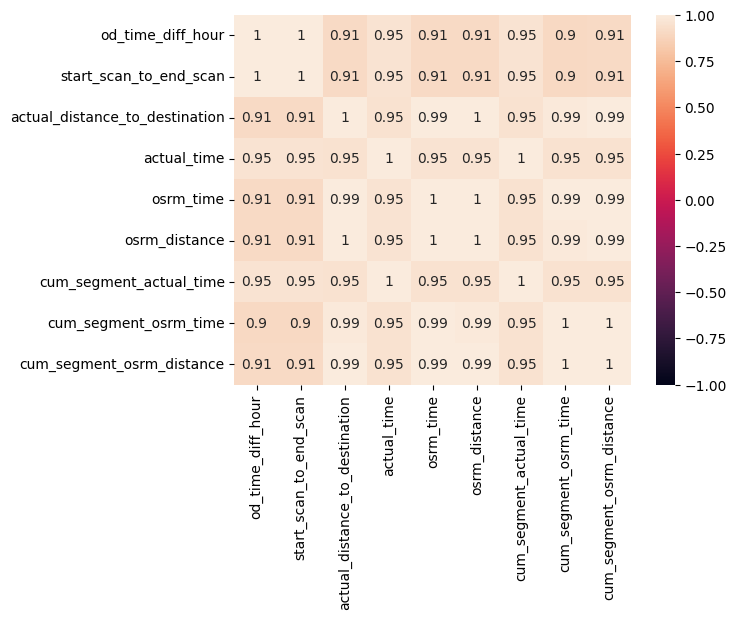

In [48]:
sns.heatmap(data = df1[numerical_columns].corr(), vmin=-1,vmax=1,annot=True)

In [49]:
df2 = df1.groupby(by = "trip_uuid", as_index=False).agg({
                        "data":"first",
                        "segment_key" : "first",
                       "trip_creation_time": "first",
                        "route_type": "first",
                        "od_time_diff_hour": "sum",
                        "start_scan_to_end_scan": "sum",
                        "actual_distance_to_destination": "sum",
                        "actual_time" :"sum",
                        "osrm_time": "sum",
                        "osrm_distance": "sum",
                        "cum_segment_actual_time": "sum",
                        "cum_segment_osrm_time": "sum",
                        "cum_segment_osrm_distance": "sum"
                      })

In [50]:
df2.head(10)

,trip_uuid,data,segment_key,trip_creation_time,route_type,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance
0,trip-153671041653548748,training,trip-153671041653548748_IND209304AAA_IND000000ACB,2018-09-12 00:00:16.535741,FTL,37.67,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,trip-153671042288605164_IND561203AAB_IND562101AAA,2018-09-12 00:00:22.886430,Carting,3.03,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,trip-153671043369099517_IND000000ACB_IND160002AAC,2018-09-12 00:00:33.691250,FTL,65.57,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,trip-153671046011330457_IND400072AAB_IND401104AAA,2018-09-12 00:01:00.113710,Carting,1.67,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,trip-153671052974046625_IND583101AAA_IND583201AAA,2018-09-12 00:02:09.740725,FTL,11.97,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
5,trip-153671055416136166,training,trip-153671055416136166_IND600056AAA_IND602105AAB,2018-09-12 00:02:34.161600,Carting,3.17,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
6,trip-153671066201138152,training,trip-153671066201138152_IND600044AAD_IND600048AAA,2018-09-12 00:04:22.011653,Carting,1.63,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184
7,trip-153671066826362165,training,trip-153671066826362165_IND560043AAC_IND560064AAA,2018-09-12 00:04:28.263977,Carting,2.44,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203
8,trip-153671074033284934,training,trip-153671074033284934_IND395009AAA_IND395023AAD,2018-09-12 00:05:40.333071,Carting,4.68,280.0,25.454848,161.0,29.0,30.9359,161.0,29.0,30.9358
9,trip-153671079956500691,training,trip-153671079956500691_IND110024AAA_IND110014AAA,2018-09-12 00:06:39.565253,Carting,0.82,49.0,9.872146,23.0,8.0,9.9566,23.0,14.0,16.0860


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   segment_key                     14817 non-null  object        
 3   trip_creation_time              14817 non-null  datetime64[ns]
 4   route_type                      14817 non-null  object        
 5   od_time_diff_hour               14817 non-null  float64       
 6   start_scan_to_end_scan          14817 non-null  float64       
 7   actual_distance_to_destination  14817 non-null  float64       
 8   actual_time                     14817 non-null  float64       
 9   osrm_time                       14817 non-null  float64       
 10  osrm_distance                   14817 non-null  float64       
 11  cu

In [52]:
df2.describe(include = "float64").T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,14817.0,8.861121,10.980238,0.390000,2.500000,4.680000,10.640000,131.640000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
actual_time,14817.0,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
cum_segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
cum_segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000
cum_segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400


In [53]:
df2[numerical_columns].corr()

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance
od_time_diff_hour,1.000000,0.999985,0.918296,0.961136,0.926593,0.924297,0.961148,0.918565,0.919273
start_scan_to_end_scan,0.999985,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291
actual_distance_to_destination,0.918296,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061
actual_time,0.961136,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967
osrm_time,0.926593,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608
osrm_distance,0.924297,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710
cum_segment_actual_time,0.961148,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106
cum_segment_osrm_time,0.918565,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092
cum_segment_osrm_distance,0.919273,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000


<Axes: >

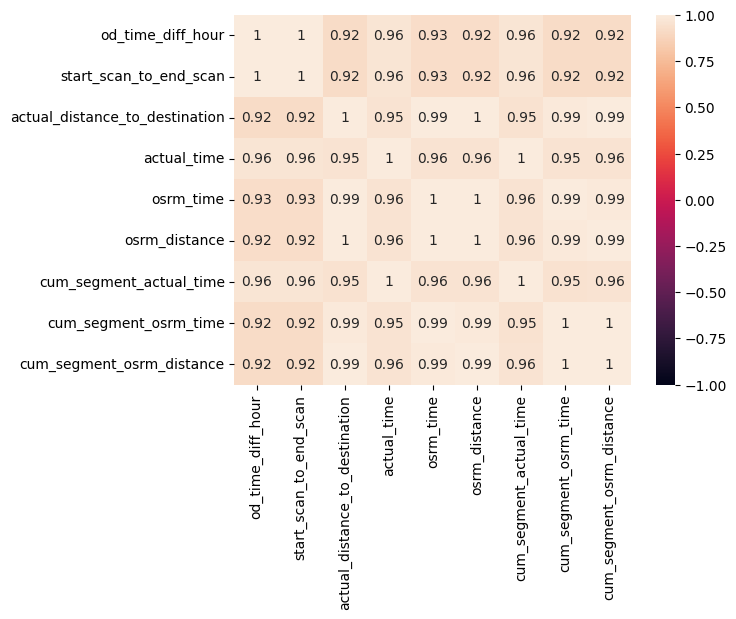

In [54]:
sns.heatmap(data = df2[numerical_columns].corr(), vmin=-1,vmax=1,annot=True)

**Outlier Detection**

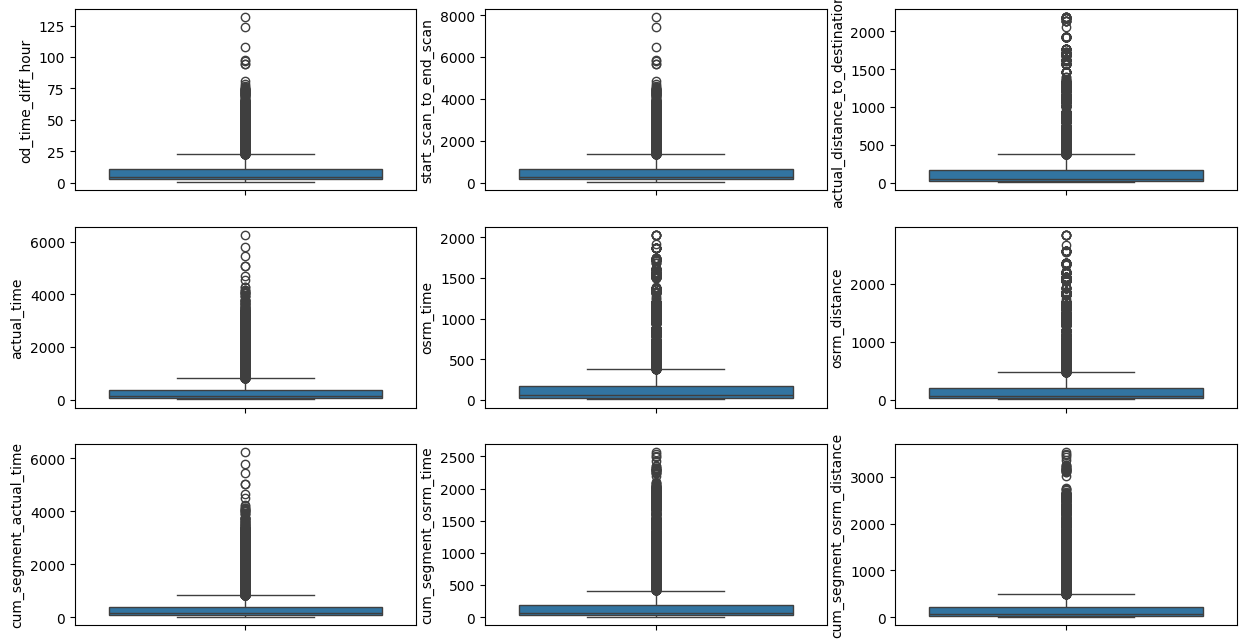

In [55]:
# outlier detection

plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.boxplot(df2["od_time_diff_hour"])

plt.subplot(3,3,2)
sns.boxplot(df2["start_scan_to_end_scan"])

plt.subplot(3,3,3)
sns.boxplot(df2["actual_distance_to_destination"])

plt.subplot(3,3,4)
sns.boxplot(df2["actual_time"])

plt.subplot(3,3,5)
sns.boxplot(df2["osrm_time"])

plt.subplot(3,3,6)
sns.boxplot(df2["osrm_distance"])

plt.subplot(3,3,7)
sns.boxplot(df2["cum_segment_actual_time"])

plt.subplot(3,3,8)
sns.boxplot(df2["cum_segment_osrm_time"])

plt.subplot(3,3,9)
sns.boxplot(df2["cum_segment_osrm_distance"])

plt.show()

**Removing Outliers**

All the numerical columns have outliers. Removing the outliers may lead to loss of data, which will affect the analysis.

So lets understand how many rows we need to need to remove after applying IQR

In [59]:

df_shape = df2.shape
sum = 0


def remove_outliers_iqr(df, column):

  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  # Calculate the IQR
  IQR = Q3 - Q1

  # Define the outlier range
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter out the outliers
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  row, col = df_filtered.shape

  num = df_shape[0]-row

  print(f"The no. of rows will be removed for {column}: {df_shape[0]-row}")
  return num

for i in numerical_columns:
  num = remove_outliers_iqr(df2, i)
  sum += num

print("-" *40)
print(f"The no. of rows will be removed: {sum}")

The no. of rows will be removed for od_time_diff_hour: 1266
The no. of rows will be removed for start_scan_to_end_scan: 1267
The no. of rows will be removed for actual_distance_to_destination: 1449
The no. of rows will be removed for actual_time: 1643
The no. of rows will be removed for osrm_time: 1517
The no. of rows will be removed for osrm_distance: 1524
The no. of rows will be removed for cum_segment_actual_time: 1643
The no. of rows will be removed for cum_segment_osrm_time: 1492
The no. of rows will be removed for cum_segment_osrm_distance: 1548
----------------------------------------
The no. of rows will be removed: 13349


**For the better understanding of the data we are not removing outliers**

In [60]:
# Creating new feature variables - trip_created_month, trip_created_year, trip_created_day

df["trip_created_month"] = df["trip_creation_time"].dt.month
df["trip_created_year"] = df["trip_creation_time"].dt.year
df["trip_created_day"] = df["trip_creation_time"].dt.day

In [61]:
df.loc[[1,2,3],["trip_uuid", "trip_created_month", "trip_created_year", "trip_created_day"]]

,trip_uuid,trip_created_month,trip_created_year,trip_created_day
1,trip-153741093647649320,9,2018,20
2,trip-153741093647649320,9,2018,20
3,trip-153741093647649320,9,2018,20


In [62]:
df_trip_created_month = df.groupby("trip_created_month")["trip_uuid"].nunique().reset_index()
df_trip_created_month.rename(columns = {"trip_uuid": "total_trips_per_month" }, inplace = True)
df_trip_created_month

,trip_created_month,total_trips_per_month
0,9,13029
1,10,1788


<Axes: xlabel='trip_created_month', ylabel='total_trips_per_month'>

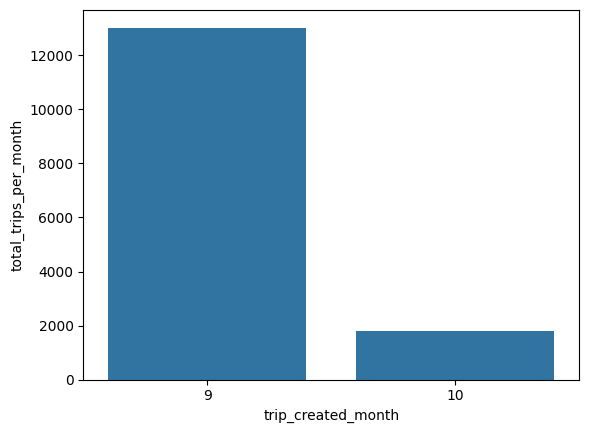

In [63]:
sns.barplot(data = df_trip_created_month, x = "trip_created_month", y = "total_trips_per_month")

In [64]:
df_trip_created_day = df.groupby("trip_created_day")["trip_uuid"].nunique().reset_index()
df_trip_created_day.rename(columns = {"trip_uuid": "total_trips_per_day" }, inplace = True)
df_trip_created_day

,trip_created_day,total_trips_per_day
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750
5,14,712
6,15,783
7,16,616
8,17,722
9,18,791


<Axes: xlabel='trip_created_day', ylabel='total_trips_per_day'>

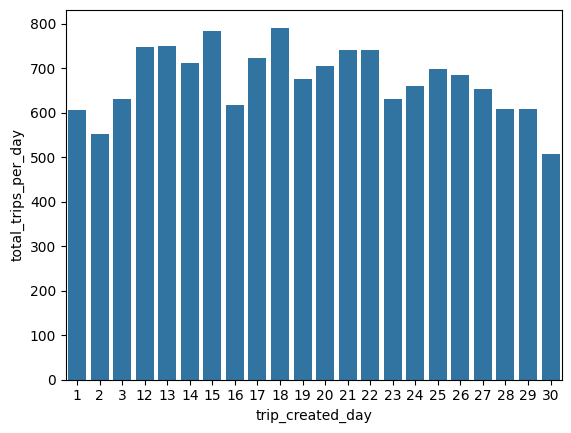

In [65]:
sns.barplot(data = df_trip_created_day, x ="trip_created_day",y =  "total_trips_per_day" )

In [66]:
df_trip_created_year = df.groupby("trip_created_year")["trip_uuid"].nunique().reset_index()
df_trip_created_year.rename(columns = {"trip_uuid": "total_trips_per_year" }, inplace = True)
df_trip_created_year

,trip_created_year,total_trips_per_year
0,2018,14817


**Insights:**

1. Creating datadrame based on grouping trip_uuid, source_center, destination_center  and creating dataframe by grouping trip_uuid helps in analysing the actual time and distance with ORSM time and distance and also Segement ORSM time and distance.

2. From the corrlation table and heat map we can find that time and distance are positively correlated.

3. September month had the maximum no. of trips 13029.

4. On all the days of the month approximately more than 500 trips are booked and with highest booking on 15th and 18th.


# 6. Visual Analysis:

[]

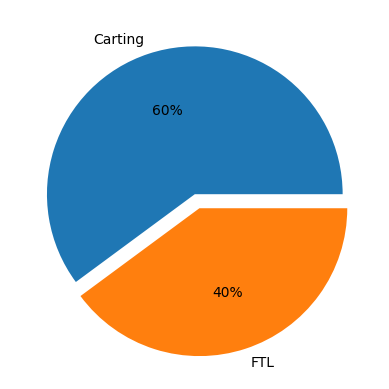

In [67]:
df_route_type = df.groupby("route_type")["trip_uuid"].nunique().reset_index()
plt.pie(df_route_type["trip_uuid"], labels =df_route_type["route_type"], explode = [0,0.1], autopct='%.0f%%')
plt.plot()


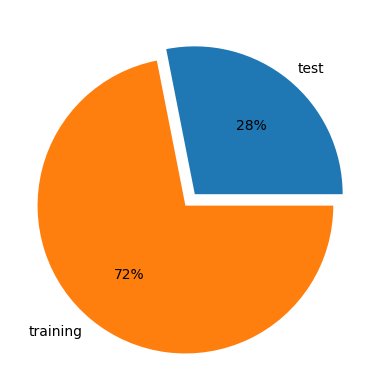

In [68]:
df_data = df.groupby("data")["trip_uuid"].nunique().reset_index()
plt.pie(df_data["trip_uuid"], labels = df_data["data"], explode = [0,0.1], autopct='%.0f%%')
plt.show()

**Insights:**

1. Carting(using small trucks)  are used for 60% of the trips and FTL(Full Truck Load) is used for 40% of the trips.

2. In the full dataset, 72% comes under training and 40% of the data comes under testing


# 6. Hypothesis Testing

**6.1 Actual time aggregated Vs OSRM time aggregated**

**Step 1:**

  Ho: Actual time aggregted and ORSM time aggregated are same

  Ha: Actual time aggregted and ORSM time aggregated are different

In [ ]:
df2[["actual_time", "osrm_time"]].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,161.384018
std,561.396157,271.360995
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


**Step 2:**

**Paired T-test** is best suitable test.

It is paired because, it is two sets of related data-the actual time and the OSRM times(system generated time) for covering the same distance between two places.

To apply t-test we need to check whether the data passes Normality check.

1. QQ plot
2. Shapiro – Wilk Test

If the data doesnot follow Normality, then we need to perform, **Wilcoxon Signed-Rank Test**
   



**QQ Plot**

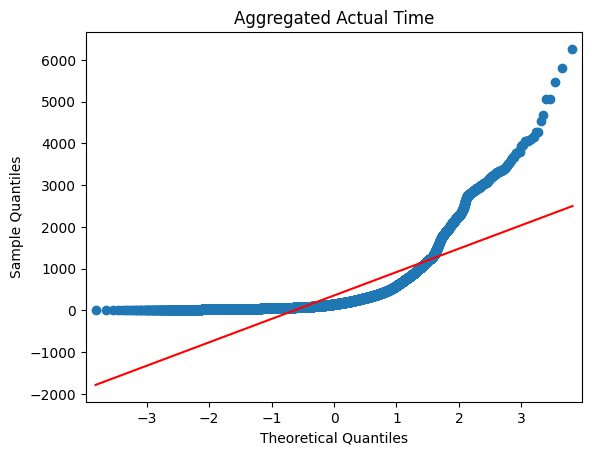

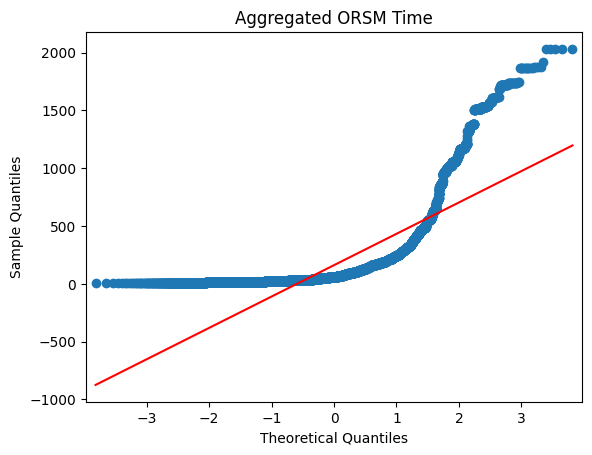

In [ ]:

sm.qqplot(df2["actual_time"], line = "s")
plt.title("Aggregated Actual Time")
plt.show()


sm.qqplot(df2["osrm_time"], line ="s")
plt.title("Aggregated ORSM Time")
plt.show()

***The QQ plot clearly shows that the data is not normally distributed.***

**Shapiro – Wilk Test**

  This is a statistical test. If the pvalue is greater than 0.05 the data follows normal distribution. Conversely, if the pvalue is low, the data distribution is significantly different from normal distribution.

In [ ]:
test_stat, p_value = shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The actual_time does not follow normal distribution')
else:
  print('The actual_time follows normal distribution')


test_stat, p_value = shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The osrm_time does not follow normal distribution')
else:
  print('The osrm_time follows normal distribution')


p-value 0.0
The actual_time does not follow normal distribution
p-value 0.0
The osrm_time does not follow normal distribution


**From the above values we can see that p_value is <0.05. Which shows that the data is not normal**

**Test to find whether different groups have equal Variance:**


***LeveneTest:***

The pvalue from the levene test, tells us whether the variances across the groups are statistically similar or if there are significant differences

Here we are taking alpha = 0.05

If the pvalue is high (>0.05) it implies that the variance are relatively equal across the groups. On the other hand if the pvalue is low (<0.05 ) variance significantly differ across the group.


In [ ]:
stats, p_value = levene(df2['actual_time'],df2['osrm_time'] )
if p_value < 0.05:
  print('The actual_time and osrm_time does not have same variance')
else:
  print('The actual_time and osrm_time have same variance')


The actual_time and osrm_time does not have same variance


Levene test shows that data does not have same variance.

**Normality and Variance test failed, which implies that the conditions for Parametic Hypothosis Testing is falied**

So we need to apply paired and non-paramertic test.

**Step: 3**

alpha value = 0.05

Test : Wilcoxon Signed-Rank Test

In [ ]:
stats, p_value = wilcoxon(df2['actual_time'],df2['osrm_time'] )
if p_value < 0.05:
  print('There is significance difference between actual_time and osrm_time')
else:
  print('The actual_time and osrm_time are same')


There is significance difference between actual_time and osrm_time


**Insights:**

We reject the Null hypthesis.

**The Actual time to complete the trip and the OSRM time**(An open-source routing engine time calculator which computes the shortest path between points in a given map -Includes usual traffic, distance through
major and minor roads and gives the time) **are different.**


**6.2 Actual_time aggregated Vs and Segment actual time aggregated
value.**

In the dataset, a trip is divided to many sub-trips. Here we are doing hypotheis testing on the actual time(time taken to cover the distance between 2 places) and segment time(sum of the time taken by the sub_trips to complete the trip)

**Step 1:**

Ho:  Aggregated Actual time and Aggregated Segment actual time are same.

Ho:  Aggregated Actual time and Aggregated Segment actual time are different.

In [ ]:
df2[["actual_time","cum_segment_actual_time" ]].describe()

,actual_time,cum_segment_actual_time
count,14817.000000,14817.000000
mean,357.143754,353.892286
std,561.396157,556.247965
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


**Step 2:**

**Paired T-test** is best suitable test.

It is paired because, it is two sets of related data-the actual time and the OSRM times(system generated time) for covering the same distance between two places.

To apply t-test we need to check whether the data passes Normality check.

1. QQ plot
2. Shapiro – Wilk Test

To check whether the data has same variance:

1. Levene Test

If the data doesnot follow Normality, then we need to perform, **Wilcoxon Signed-Rank Test**

**QQ Plot**

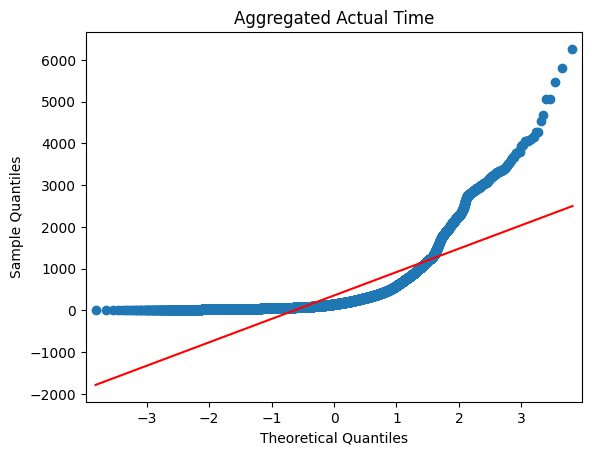

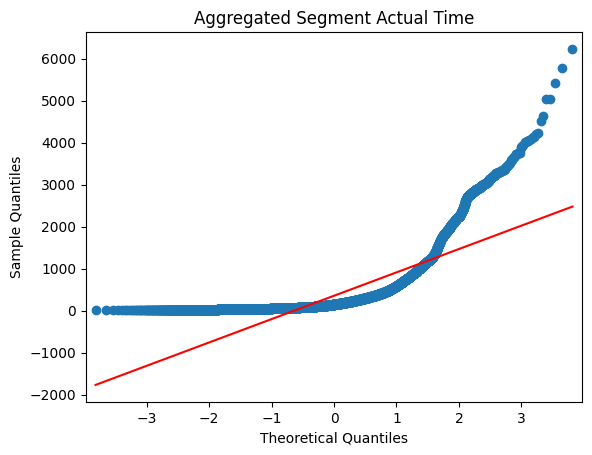

In [ ]:
sm.qqplot(df2["actual_time"], line = "s")
plt.title("Aggregated Actual Time")
plt.show()


sm.qqplot(df2["cum_segment_actual_time"], line ="s")
plt.title("Aggregated Segment Actual Time")
plt.show()

***The QQ plot clearly shows that the data is not normally distributed.***

**Shapiro – Wilk Test**

  This is a statistical test. If the pvalue is greater than 0.05 the data follows normal distribution. Conversely, if the pvalue is low, the data distribution is significantly different from normal distribution.

In [ ]:
test_stat, p_value = shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The Actual Time does not follow normal distribution')
else:
  print('The Actual Time follows normal distribution')


test_stat, p_value = shapiro(df2['cum_segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The Aggregated Segment Actual Time does not follow normal distribution')
else:
  print('The Aggregated Segment Actual Time follows normal distribution')

p-value 0.0
The Actual Time does not follow normal distribution
p-value 0.0
The Aggregated Segment Actual Time does not follow normal distribution


**From the above values we can see that p_value is <0.05. Which shows that the data is not normal**

**Test to find whether different groups have equal Variance:**


***LeveneTest:***

The pvalue from the levene test, tells us whether thevariances across the groups are statistically similar or if there are significant differences

Here we are taking alpha = 0.05

If the pvalue is high (>0.05) it implies that the variance are relatively equal across the groups. On the other hand if the pvalue is low (<0.05 ) variance significantly differ across the group.

In [ ]:
stats, p_value = levene(df2['actual_time'],df2['cum_segment_actual_time'] )
if p_value < 0.05:
  print('The actual_time and cum_segment_actual_time does not have same variance')
else:
  print('The actual_time and cum_segment_actual_time have same variance')

The actual_time and cum_segment_actual_time have same variance


**Levene test shows that data have same variance.**

**Normality test failed, which implies that the conditions for Parametic Hypothosis Testing is falied**

So we need to apply paired and non-paramertic test.

**Step: 3**

alpha value = 0.05

Test : Wilcoxon Signed-Rank Test

In [ ]:
stats, p_value = wilcoxon(df2['actual_time'],df2['cum_segment_actual_time'] )
if p_value < 0.05:
  print('There is significance difference between actual_time and cum_segment_actual_time')
else:
  print('The actual_time and cum_segment_actual_time are same')

There is significance difference between actual_time and cum_segment_actual_time


**Insights:**

We reject the Null hypotheis.

**The actual_time and cum_segment_actual_time are different**

**6.3 OSRM distance aggregated and segment OSRM distance aggregated value**


OSRM distance aggregated is the open source routing engine generated distance between 2 places.

Segment OSRM distance aggregated is the aggregation of open source routing engine generated distance for sub_trips under the trip.

**Step 1:**

Ho:  OSRM distance aggregated  and segment OSRM distance aggregated are same.

Ho:  OSRM distance aggregated  and segment OSRM distance aggregated are different.

In [ ]:
df2[["osrm_distance","cum_segment_osrm_distance" ]].describe()

,osrm_distance,cum_segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344689,223.201161
std,370.395573,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


**Step 2:**


**Paired T-test** is best suitable test.

It is paired because, it is two sets of related data-OSRM distance aggregated and segment OSRM distance aggregated for covering the same distance between two places.

To apply t-test we need to check whether the data passes Normality check.

1. QQ plot

2. Shapiro – Wilk Test

To check whether the data has same variance:

  Levene Test

If the data follws Normality then we need to follow ttest_rel

Otherwise If the data doesnot follow Normality, then we need to perform, Wilcoxon Signed-Rank Test

**QQ Plot**

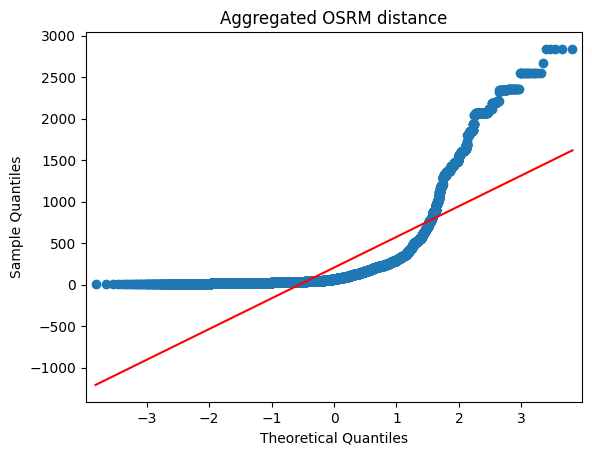

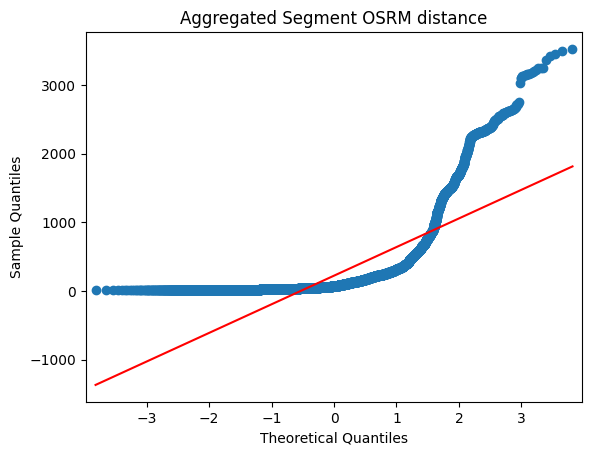

In [ ]:
sm.qqplot(df2["osrm_distance"], line = "s")
plt.title("Aggregated OSRM distance")
plt.show()


sm.qqplot(df2["cum_segment_osrm_distance"], line ="s")
plt.title("Aggregated Segment OSRM distance")
plt.show()

***The QQ plot clearly shows that the data is not normally distributed.***

**Shapiro – Wilk Test**

  This is a statistical test. If the pvalue is greater than 0.05 the data follows normal distribution. Conversely, if the pvalue is low, the data distribution is significantly different from normal distribution.

In [ ]:
test_stat, p_value = shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The Aggregated OSRM distance does not follow normal distribution')
else:
  print('The Aggregated OSRM distance follows normal distribution')


test_stat, p_value = shapiro(df2['cum_segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The Aggregated Segment OSRM distance does not follow normal distribution')
else:
  print('The Aggregated Segment OSRM distance follows normal distribution')

p-value 0.0
The Aggregated OSRM distance does not follow normal distribution
p-value 0.0
The Aggregated Segment OSRM distance does not follow normal distribution


**From the above values we can see that p_value is <0.05. Which shows that the data is not normal**

**Test to find whether different groups have equal Variance:**


***LeveneTest:***

The pvalue from the levene test, tells us whether thevariances across the groups are statistically similar or if there are significant differences

Here we are taking alpha = 0.05

If the pvalue is high (>0.05) it implies that the variance are relatively equal across the groups. On the other hand if the pvalue is low (<0.05 ) variance significantly differ across the group.

In [ ]:
stats, p_value = levene(df2['osrm_distance'],df2['cum_segment_osrm_distance'] )
if p_value < 0.05:
  print('The osrm_distance and cum_segment_osrm_distance does not have same variance')
else:
  print('The osrm_distance and cum_segment_osrm_distance have same variance')

The osrm_distance and cum_segment_osrm_distance does not have same variance


**Levene test shows that data have same variance.**

**Normality test failed, which implies that the conditions for Parametic Hypothosis Testing is falied**

So we need to apply paired and non-paramertic test.

**Step: 3**

alpha value = 0.05

Test : Wilcoxon Signed-Rank Test

In [ ]:
stats, p_value = wilcoxon(df2['osrm_distance'],df2['cum_segment_osrm_distance'] )
if p_value < 0.05:
  print('There is significance difference between osrm_distance and cum_segment_osrm_distance')
else:
  print('The osrm_distance and cum_segment_osrm_distance are same')

There is significance difference between osrm_distance and cum_segment_osrm_distance


**Insights:**

From the pvalue we can reject Ho.

OSRM distance and the aggregated segment OSRM distance are not same.

**6.4 OSRM time aggregated and aggregated segement OSRM time value**

OSRM time is the open souce routing engine generated time between 2 places.

Aggregated segement OSRM time is the aggretion of OSRM time generated for each sub trip under a trip.aggregation

**Step 1:**

Ho:  OSRM time aggregated  and segment OSRM time aggregated are same.

Ho:  OSRM time aggregated  and segment OSRM time aggregated are different.

In [ ]:
df2[["osrm_time", "cum_segment_osrm_time"]].describe()

,osrm_time,cum_segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.949787
std,271.360995,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


**Step 2:**


**Paired T-test** is best suitable test.

It is paired because, it is two sets of related data-OSRM distance aggregated and segment OSRM distance aggregated for covering the same distance between two places.

To apply t-test we need to check whether the data passes Normality check.

1. QQ plot

2. Shapiro – Wilk Test

To check whether the data has same variance:

  Levene Test

If the data follws Normality then we need to follow ttest_rel

Otherwise If the data doesnot follow Normality, then we need to perform, Wilcoxon Signed-Rank Test

**QQ plot**

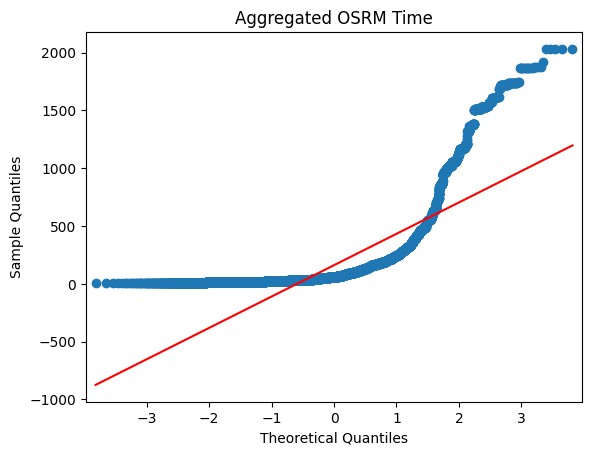

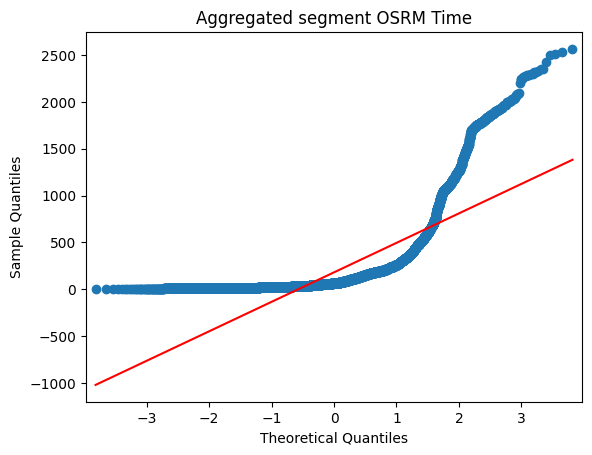

In [69]:
sm.qqplot(df2["osrm_time"], line ="s")
plt.title("Aggregated OSRM Time")
plt.show()

sm.qqplot(df2["cum_segment_osrm_time"], line ="s")
plt.title("Aggregated segment OSRM Time")
plt.show()

***The QQ plot clearly shows that the data is not normally distributed.***

**Shapiro – Wilk Test**

  This is a statistical test. If the pvalue is greater than 0.05 the data follows normal distribution. Conversely, if the pvalue is low, the data distribution is significantly different from normal distribution.

In [ ]:
test_stat, p_value = shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The Aggregated OSRM time does not follow normal distribution')
else:
  print('The Aggregated OSRM time follows normal distribution')


test_stat, p_value = shapiro(df2['cum_segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
  print('The Aggregated Segment OSRM time does not follow normal distribution')
else:
  print('The Aggregated Segment OSRM time follows normal distribution')

p-value 0.0
The Aggregated OSRM time does not follow normal distribution
p-value 0.0
The Aggregated Segment OSRM time does not follow normal distribution


**From the above values we can see that p_value is <0.05. Which shows that the data is not normal**

**Test to find whether different groups have equal Variance:**


***LeveneTest:***

The pvalue from the levene test, tells us whether thevariances across the groups are statistically similar or if there are significant differences

Here we are taking alpha = 0.05

If the pvalue is high (>0.05) it implies that the variance are relatively equal across the groups. On the other hand if the pvalue is low (<0.05 ) variance significantly differ across the group.

In [ ]:
stats, p_value = levene(df2['osrm_time'],df2['cum_segment_osrm_time'] )
if p_value < 0.05:
  print('The osrm_time and cum_segment_osrm_time does not have same variance')
else:
  print('The osrm_time and cum_segment_osrm_time have same variance')

The osrm_time and cum_segment_osrm_time does not have same variance


**Levene test shows that data have same variance.**

**Normality test failed, which implies that the conditions for Parametic Hypothosis Testing is falied**

So we need to apply paired and non-paramertic test.

**Step: 3**

alpha value = 0.05

Test : Wilcoxon Signed-Rank Test

In [ ]:
stats, p_value = wilcoxon(df2['osrm_time'],df2['cum_segment_osrm_time'] )
if p_value < 0.05:
  print('There is significance difference between osrm_time and cum_segment_osrm_time')
else:
  print('The osrm_time and cum_segment_osrm_time are same')

There is significance difference between osrm_time and cum_segment_osrm_time


**Insights:**

We reject the Null hypotheis.

**The osrm_time and cum_segment_osrm_time are different**

**7. One Hot Encoding**

We can apply one hot encoding route_type, data

**Applying one hot encodeing on data column.** data column is a categorical column has only 2 values, training and test

In [ ]:
df2["data"].value_counts().reset_index()

,data,count
0,training,10654
1,test,4163


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2["data"] = label_encoder.fit_transform(df2["data"])


In [ ]:
df2["data"].value_counts().reset_index()

,data,count
0,1,10654
1,0,4163


**Applying one hot encoding on route_type**

In [ ]:
df2["route_type"].value_counts().reset_index()

,route_type,count
0,Carting,8908
1,FTL,5909


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2["route_type"] = label_encoder.fit_transform(df2["route_type"])

df2["route_type"].value_counts().reset_index()

,route_type,count
0,0,8908
1,1,5909


**8. Normalizationa and Standadization**

Normalization is used when we want the data to bound the feature(column) to a specific value generally [1,0]

Standadization is used when we want to center the data around the mean

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df2[numerical_columns]), columns=df2[numerical_columns].columns)
df_normalized.head(5)

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cum_segment_actual_time,cum_segment_osrm_time,cum_segment_osrm_distance
0,0.284038,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134
1,0.020114,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373
2,0.496610,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625
3,0.009752,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074
4,0.088229,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185


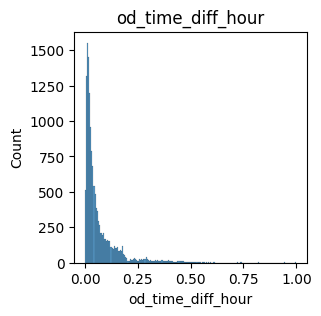

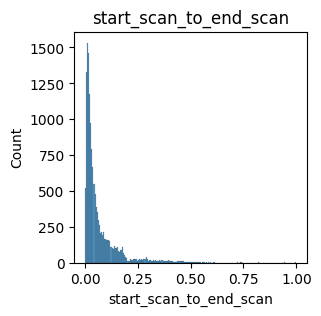

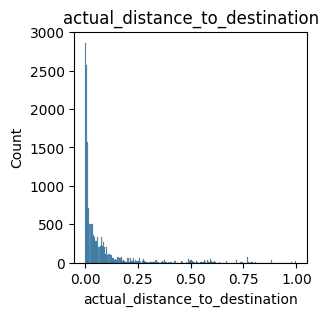

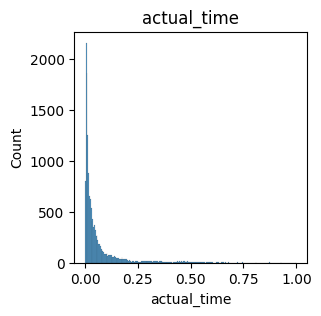

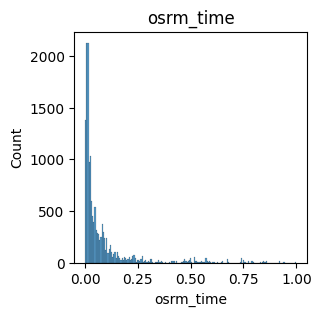

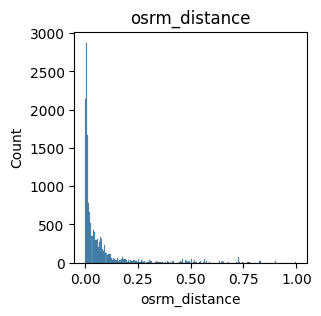

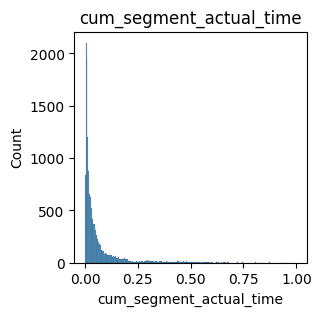

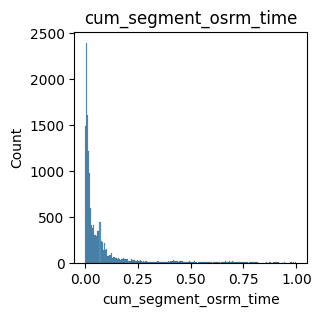

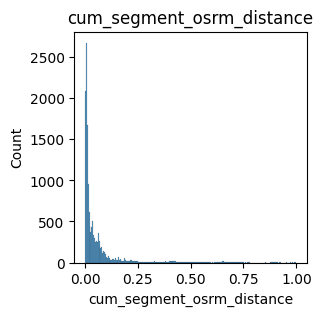

In [ ]:
for i in numerical_columns:
  plt.figure(figsize =(3,3))
  sns.histplot(df_normalized[i])
  plt.title(i)
  plt.show()

After applying Normalization function, we can see that the data is right skewed.



**Consolidated Insights:**

1. The dataset has 144867 rows and 19 columns after removing unwanted columns.

2. The dataset has 2 types of data, training and test. Training has 72% of the data and test has 28% of data.

3. 2 types routes were used. Carting and FTL, 60% of trips used Carting and 40% of the trips used FTL.

4. There are about 14817 unique trips, 1508 source centers and 1481 destination centers.

5. The dateset has records from date : 2018-09-12  to : 2018-10-03

6. No. of orders placed in september month is high because the data has 21 days data from september and only 10 days data from october.

7. Customer base is high in  Bangalore, Gurgaon, Mumbai  and Hydrabad
Amoung  the  cities-Gurgaon , Bangalore, Bhiwandi, Mumbai and Delhi has huge sellers.

8. Maximum no. of order delivery starts  and the maximum no. of delivery gets completed in the states - Karnataka, Maharastra, Haryana, TamilNadu and Telungana.

9. On all the days of the month approximately more than 500 trips are booked and with highest booking on 15th and 18th.

10. Tripura, Meghalaya, Mizorm, Dadra and Nagar haveli and Pondicherry has very low custome base.

11. actual_time aggregated value and OSRM time aggregated value. Are different

12. actual_time aggregated value and segment actual time aggregated value are different.

13. OSRM distance aggregated value and segment OSRM distance aggregated value are different.

14. OSRM time aggregated value and segment OSRM time aggregated value are different.


**Recommendations:**

1. The OSRM (Open Source Routing Machine) time and actual travel time often show discrepancies, leading to inaccurate delivery time predictions. To ensure customers receive their deliveries on time, it is crucial to enhance the time prediction algorithms. Similarly, differences between OSRM distance and actual distance traveled highlight the need for improving route optimization to identify the most efficient paths.

2. Additionally, there are inconsistencies between the actual time/distance and the aggregated time/distance of segments, suggesting that the current segmentation process requires refinement for more accurate predictions.

3. In regions like Tripura, Meghalaya, Mizoram, Dadra and Nagar Haveli, and Pondicherry, there is a low customer base. To address this, specific strategies should be implemented to increase customer engagement and market presence in these areas.

4. For instance, consider the trip with segment key 153755502932196495_IND160002AAC_IND562132AAA, which involves 81 subtrips. Reducing the number of subtrips can expedite package delivery and lower freight charges due to shorter travel distances, benefiting both the customers and the company.

5. By addressing these issues, the company can improve delivery accuracy, reduce costs, and expand its customer base in underrepresented regions.

In [80]:
# Check the current working directory
!pwd

# List all files in the current directory
!ls -l

/content
total 54324
-rw-r--r-- 1 root root 55617130 Jun  7 12:41 delhivery_data.csv
drwxr-xr-x 1 root root     4096 Jun  5 13:35 sample_data


In [72]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install -q nbconvert

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


In [83]:
from google.colab import files

# Install necessary packages
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install -q nbconvert

# Convert the notebook to PDF
!jupyter nbconvert --to pdf Delhivery_CaseStudy.ipynb

# Download the PDF
files.download('Delhivery_CaseStudy.pdf')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern 'Delhivery_CaseStudy.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent

FileNotFoundError: Cannot find file: Delhivery_CaseStudy.pdf

In [77]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/Delhivery_CaseStudy.ipynb

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/ColabNotebooks/Delhivery_CaseStudy.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to